# Animation of current testing apparatus sensor data


now in 3D



<IPython.core.display.Javascript object>


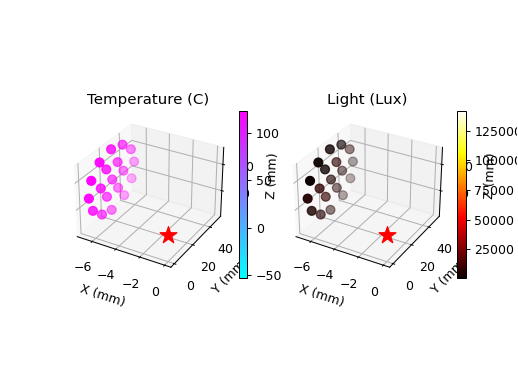

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

%matplotlib notebook

# Define the 3D coordinates of the sensors
sensor_coords = np.array([[-6.8,  25.9 , 29.2],
                         [ -6.8 , 14.5,  25.9],
                         [ -6.8 , 20.7 , 17.2],
                         [ -6.8 ,  6.2 , 17.3],
                         [ -6.8 ,  3.4 ,  5.8],
                         [ -6.8 , 14.9 ,  6.3],
                         [ -6.8 , 26.3 ,  6.2],
                         [ -6.8 , 20.6 , -3.6],
                         [ -6.8 ,  6.7 , -5.6],
                         [ -6.8 , 15.2 ,-14. ],
                         [ -6.8 , 25.0 ,-16.7],
                         [ -6.8,  32.0 , -3.7],
                         [ -6.8 , 38.2 ,-13.4],
                         [ -6.8 , 37.8 ,  6.2],
                         [ -6.8 , 32.1 , 16.1],
                         [ -6.8,  37.4 , 26.3],
                         [ -6.8  ,46.0 , 18.1],
                         [ -6.8,  49.3 ,  6.7],
                         [ -6.8,  46.4 , -4.9]])

# Define the 3d coords of the light source
light_source = np.array([0,0,0])

#Convert thermistor readings to temperature in celsius 
def convert_ntc_to_temp(voltage):
    beta = 3950
    r0 = 10000
    t0 = 298.15
    r_ntc = 10000 * voltage / (3.3 - voltage)  
    temperature = beta / (np.log(r_ntc / r0) + beta / t0) - 273.15 
    return temperature

#convert photoresistor readings to lux 
def convert_photores_to_lux(voltage):
    # Parameters for to calibrate m, b (assumingn linear relationship)
    m = 2.0 # slope
    b = 0.0 # y-int
    r = (3.3 - voltage) * 10000 / voltage
    lux = (r - b) / m
    return lux

# Define the figure and the 3D axes
fig = plt.figure()

# Define the temperature 3D axis
ax_temp = fig.add_subplot(121, projection='3d')
temperatures = np.random.randint(1, 10000, size=len(sensor_coords))
voltages = temperatures / 10000.0 * 3.3
temperatures = convert_ntc_to_temp(voltages)
scatter_temp = ax_temp.scatter(sensor_coords[:, 0], sensor_coords[:, 1], sensor_coords[:, 2], c=temperatures, cmap='cool', s=50)
ax_temp.scatter(light_source[0], light_source[1], light_source[2], c='red', marker='*', s=200)
ax_temp.set_xlabel('X (mm)')
ax_temp.set_ylabel('Y (mm)')
ax_temp.set_zlabel('Z (mm)')
ax_temp.set_title('Temperature (C)')
cbar_temp = fig.colorbar(scatter_temp, ax=ax_temp, fraction=0.046, pad=0.04)
cbar_temp.ax.set_ylabel('Temperature (C)', rotation=270, labelpad=10)

# Define the light 3D axis
ax_light = fig.add_subplot(122, projection='3d')
light_values = np.random.randint(1, 10000, size=len(sensor_coords))
voltages = light_values / 10000 * 3.3
light_values = convert_photores_to_lux(voltages)
scatter_light = ax_light.scatter(sensor_coords[:, 0], sensor_coords[:, 1], sensor_coords[:, 2], c=light_values, cmap='hot', s=50)
ax_light.scatter(light_source[0], light_source[1], light_source[2], c='red', marker='*', s=200)
ax_light.set_xlabel('X (mm)')
ax_light.set_ylabel('Y (mm)')
ax_light.set_zlabel('Z (mm)')
ax_light.set_title('Light (Lux)')
cbar_temp = fig.colorbar(scatter_light, ax=ax_light, fraction=0.046, pad=0.04)
cbar_temp.ax.set_ylabel('Light (lux)', rotation=270, labelpad=10)

# Define the animation function
def animate(frame):
    # Read the temperature and light values for each sensor
    temperatures = np.random.randint(0, 10000, size=len(sensor_coords))
    light_values = np.random.randint(0, 10000, size=len(sensor_coords))
    
    #TODO: get data from arduiono serial monitor setup
    #tempereratures = serial_stream()
    #light_values = serial_stream()
    
    # Update the temperature and light values for the scatter plots
    scatter_temp.set_array(temperatures)
    scatter_light.set_array(light_values)
    
    return scatter_temp, scatter_light,
ani = animation.FuncAnimation(fig, animate, frames=200, interval=100)
plt.show()


#html = ani.to_jshtml()
#with open('animation.html', 'w') as f:
#    f.write(html)